In [1]:
# Jupyter notebook which analysis real time values of spectrogram extracted from a debugging session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import librosa
import librosa.display
import pickle

In [10]:
# Load samples
samples = np.loadtxt('real_time_samples.txt', delimiter=',')
samples = samples.reshape(30, 32)
print(samples.shape)

(30, 32)


In [44]:
# Normalize spectogram if needed, depends on debugging position
normalize_dir = './normalize/'
scaler = pickle.load(open(normalize_dir + 'scaler.pkl', 'rb'))
samples = samples.reshape(1, 960)
samples = scaler.transform(samples)
samples = samples.reshape(30, 32)

[[3.74941237 3.69961812 3.71217579 3.65074098 3.65701069 3.74881976
  3.76676418 3.84062533 3.7167477  3.69484681 3.73002924 3.64465626
  3.59746036 3.61765399 3.71460006 3.77137834 3.79546374 3.73515974
  3.68903902 3.71307933 3.66185644 3.67322873 3.69859258 3.76019407
  3.78601219 3.67613097 3.67216873 3.6798028  3.667992   3.68302276
  3.67369546 3.65825645]
 [3.4669655  3.4346254  3.42264077 3.35807017 3.34735856 3.43252071
  3.44523117 3.52680984 3.43664767 3.41846959 3.45606307 3.34033028
  3.30428407 3.33129711 3.42738358 3.43755244 3.48473703 3.44355731
  3.42901129 3.41825086 3.3692964  3.4076545  3.41817643 3.45255331
  3.4838253  3.37873753 3.3630861  3.40623315 3.38367725 3.37436626
  3.36348207 3.39446047]
 [3.73116954 3.79092279 3.75352773 3.63040797 3.63556538 3.71036529
  3.72755906 3.85386134 3.79148245 3.74153255 3.78365552 3.66135636
  3.6239555  3.60994084 3.70604962 3.75924027 3.79181922 3.76120345
  3.76971444 3.7489542  3.6363272  3.67734918 3.70162981 3.7030124

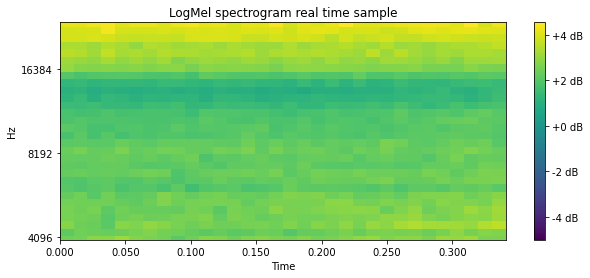

In [11]:
# Plot log mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(samples, sr=48000, y_axis='mel',fmin=4000,  fmax=24000,
                         x_axis='time', cmap='viridis', vmin=-5.0)
plt.colorbar(format='%+2.0f dB')
plt.title('LogMel spectrogram real time sample')
plt.show()

In [5]:
# Load model
model = keras.models.load_model('wmc.h5', compile = True)

In [12]:
# Make the prediction
samples_r = samples.reshape(1, 30, 32, 1)
prediction = model.predict(samples_r)

print(prediction)

[[1.000000e+00 2.504194e-11 7.667785e-26]]
